In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pickle
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Load Dataset
df = pd.read_csv("telco.csv")

In [5]:
df.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


In [6]:
df.shape

(7043, 50)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

In [8]:
df = df.drop(['Customer ID'], axis = 1)
df.head()

,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,City,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,Male,78,No,Yes,No,No,0,United States,California,Los Angeles,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,Female,74,No,Yes,Yes,Yes,1,United States,California,Los Angeles,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,Male,71,No,Yes,No,Yes,3,United States,California,Los Angeles,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,Female,78,No,Yes,Yes,Yes,1,United States,California,Inglewood,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,Female,80,No,Yes,Yes,Yes,1,United States,California,Whittier,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


In [9]:
features = ["tenure", "MonthlyCharges", "TotalCharges"]

for col in df.columns:
  if col not in features:
    print(col, df[col].unique())
    print("-"*50)

Gender ['Male' 'Female']
--------------------------------------------------
Age [78 74 71 80 72 76 66 70 77 65 67 68 69 79 75 73 37 19 31 23 38 21 29 61
 27 20 56 51 48 32 34 41 30 26 62 64 45 53 63 42 24 54 39 43 50 22 40 47
 60 52 55 59 49 58 25 28 33 44 57 46 36 35]
--------------------------------------------------
Under 30 ['No' 'Yes']
--------------------------------------------------
Senior Citizen ['Yes' 'No']
--------------------------------------------------
Married ['No' 'Yes']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
Number of Dependents [0 1 3 2 5 4 6 7 8 9]
--------------------------------------------------
Country ['United States']
--------------------------------------------------
State ['California']
--------------------------------------------------
City ['Los Angeles' 'Inglewood' 'Whittier' ... 'Topaz' 'Jacumba' 'Holtville']
--------------------------------------------------
Zip Code

In [10]:
df.isnull().sum()

Gender                                  0
Age                                     0
Under 30                                0
Senior Citizen                          0
Married                                 0
Dependents                              0
Number of Dependents                    0
Country                                 0
State                                   0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Population                              0
Quarter                                 0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                     

In [11]:
df["Total Charges"].values

# Values of this feature is object type , we have to convert it to float type

array([  39.65,  633.3 , 1752.55, ..., 7362.9 ,  346.45, 6844.5 ],
      shape=(7043,))

In [12]:
df[df["Total Charges"]==" "]

# Also there are some blank spaces

,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,City,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason


In [13]:
len(df[df["Total Charges"]==" "])

0

In [14]:
df["Total Charges"] = df["Total Charges"].replace({" ": "0.0"})

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Under 30                           7043 non-null   object 
 3   Senior Citizen                     7043 non-null   object 
 4   Married                            7043 non-null   object 
 5   Dependents                         7043 non-null   object 
 6   Number of Dependents               7043 non-null   int64  
 7   Country                            7043 non-null   object 
 8   State                              7043 non-null   object 
 9   City                               7043 non-null   object 
 10  Zip Code                           7043 non-null   int64  
 11  Latitude                           7043 non-null   float

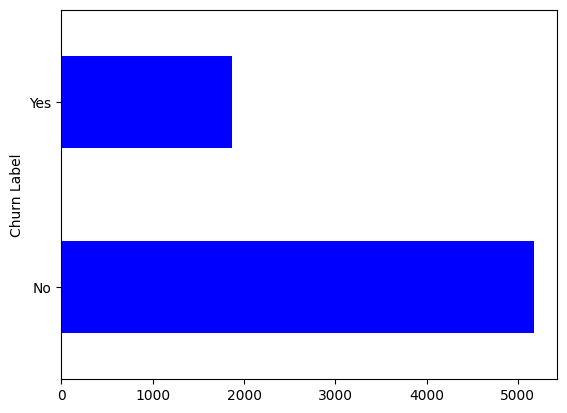

In [16]:
df['Churn Label'].value_counts().plot(kind='barh' , color = 'blue');

In [17]:
df.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Score,CLTV
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,22139.603294,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056,3.244924,58.505040,4400.295755
std,16.750352,0.962802,1856.767505,2.468929,2.154425,21152.392837,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542,1.201657,21.170031,1183.057152
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,11.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000,1.000000,5.000000,2003.000000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,2344.000000,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000,3.000000,40.000000,3469.000000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,17554.000000,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000,3.000000,61.000000,4527.000000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,36125.000000,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,4.000000,75.500000,5380.500000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,105285.000000,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,5.000000,96.000000,6500.000000


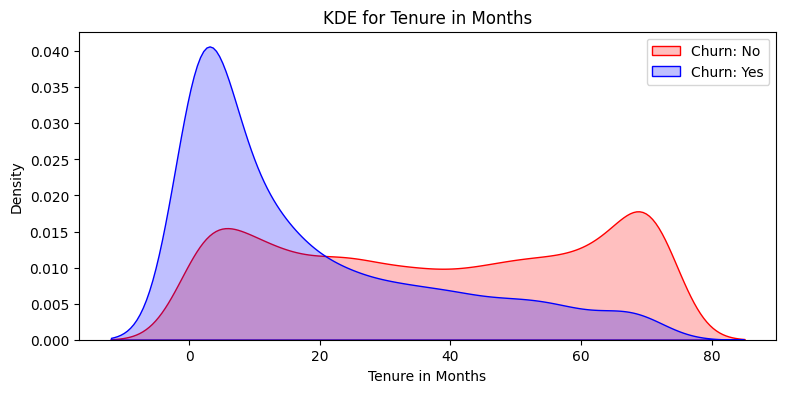

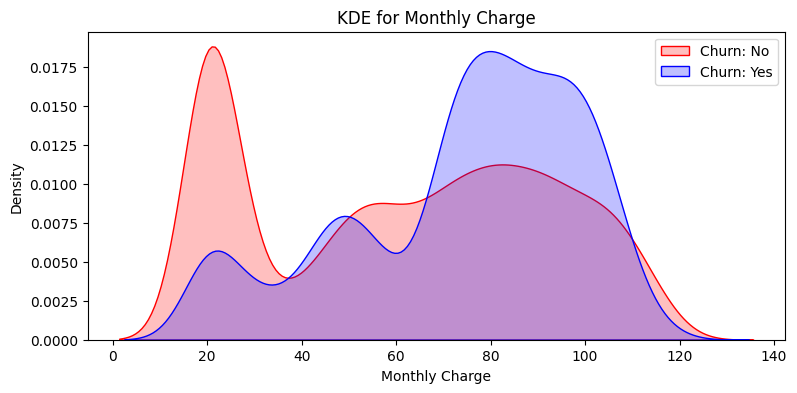

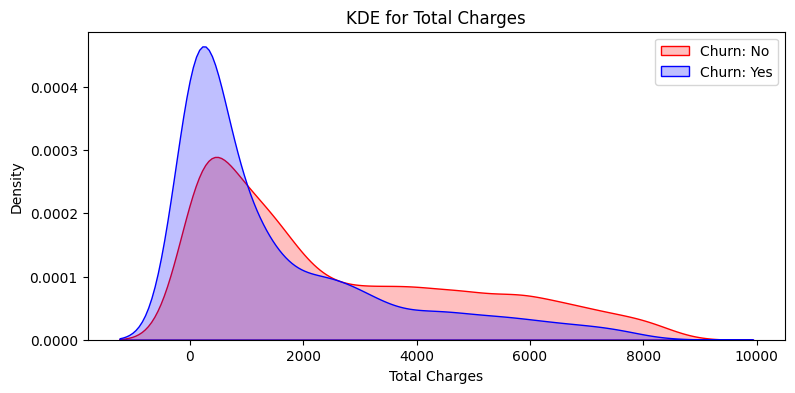

In [18]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title(f"KDE for {feature}")

    ax0 = sns.kdeplot(df[df['Churn Label'] == 'No'][feature].dropna(), color='red', label='Churn: No', shade=True)
    ax1 = sns.kdeplot(df[df['Churn Label'] == 'Yes'][feature].dropna(), color='blue', label='Churn: Yes', shade=True)
    
    plt.legend()  # legend
    plt.show()  # Ensure the plot is displayed properly

kdeplot('Tenure in Months')
kdeplot('Monthly Charge')
kdeplot('Total Charges')


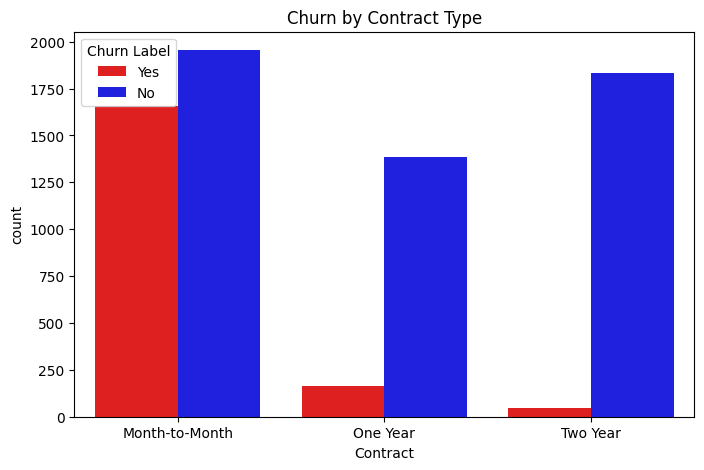

In [19]:
plt.figure(figsize=(8,5))
sns.countplot(x='Contract', hue='Churn Label', data=df, palette=['red', 'blue'])
plt.title('Churn by Contract Type')
plt.show()

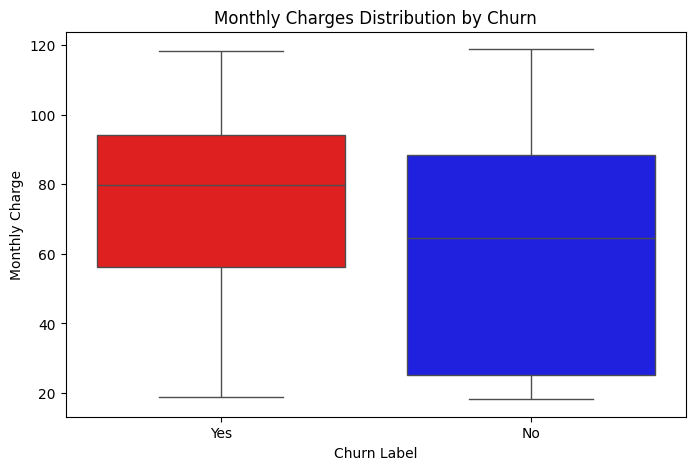

In [35]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn Label', y='Monthly Charge', data=df, palette=['red', 'blue'])
plt.title('Monthly Charges Distribution by Churn')
plt.show()


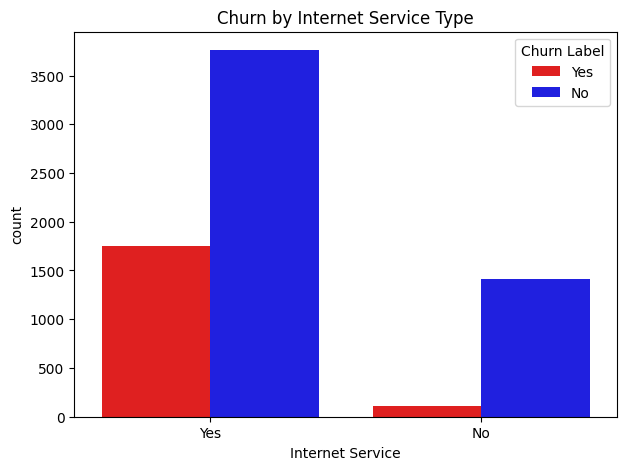

In [20]:
plt.figure(figsize=(7,5))
sns.countplot(x='Internet Service', hue='Churn Label', data=df, palette=['red', 'blue'])
plt.title('Churn by Internet Service Type')
plt.show()


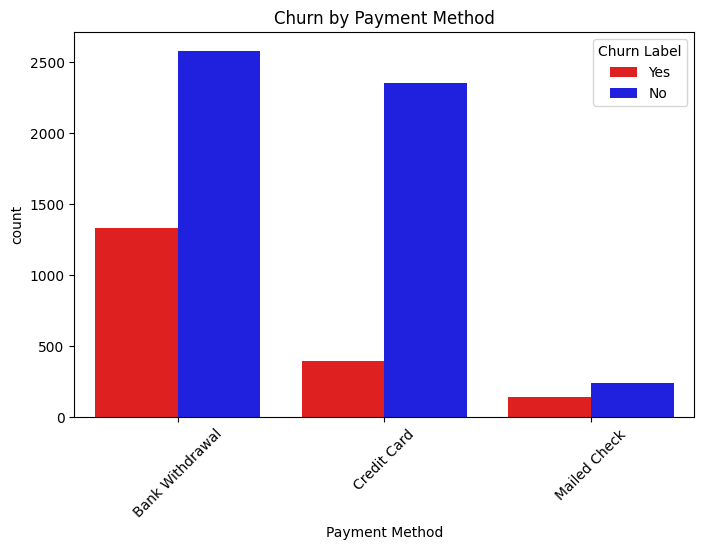

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(x='Payment Method', hue='Churn Label', data=df, palette=['red', 'blue'])
plt.xticks(rotation=45)
plt.title('Churn by Payment Method')
plt.show()


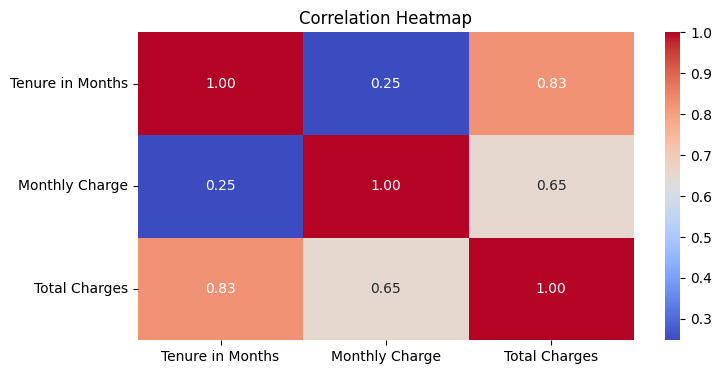

In [22]:
plt.figure(figsize=(8, 4))
sns.heatmap(df[["Tenure in Months", "Monthly Charge", "Total Charges"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [23]:
df.head(2)

,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,City,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,Male,78,No,Yes,No,No,0,United States,California,Los Angeles,...,20,0.0,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,Female,74,No,Yes,Yes,Yes,1,United States,California,Los Angeles,...,0,390.8,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer


In [24]:
# Convert target column to binary

df["Churn Label"] = df["Churn Label"].map({"Yes":1, "No":0})


In [25]:
# Drop customerID (not useful)

if "Customer ID" in df.columns:
    df = df.drop("Customer ID", axis=1)

In [26]:
# Handle TotalCharges if it's object (convert to numeric)

if df["Total Charges"].dtype == "object":
    df["Total Charges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [27]:
# Fill any missing numeric values with median

df = df.fillna(df.median(numeric_only=True))

In [28]:
# One-hot encode categorical variables

df = pd.get_dummies(df, drop_first=True)

In [29]:
# Split into features & target

X = df.drop("Churn Label", axis=1)
y = df["Churn Label"]

In [30]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [31]:
from sklearn.preprocessing import StandardScaler

# Sirf numeric columns select karo
numeric_cols = X_train.select_dtypes(include=["int64", "float64"]).columns

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


In [40]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(class_weight="balanced", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)
y_pred_probs = log_reg.predict_proba(X_test)[:, 1]


In [42]:
log_reg = LogisticRegression(class_weight="balanced", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

# Predictions

y_pred = log_reg.predict(X_test)
y_pred_probs = log_reg.predict_proba(X_test)[:,1]

In [46]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix



Classification Report:
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      1035
           1     1.0000    1.0000    1.0000       374

    accuracy                         1.0000      1409
   macro avg     1.0000    1.0000    1.0000      1409
weighted avg     1.0000    1.0000    1.0000      1409

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
ROC-AUC: 1.0


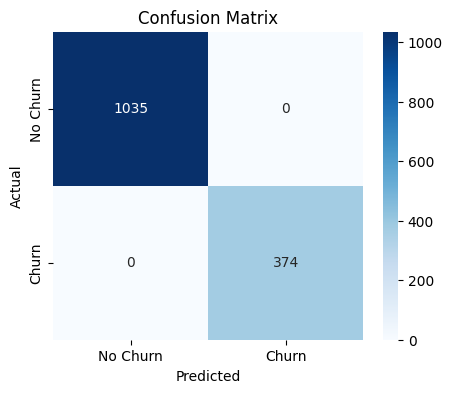

In [48]:
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_probs))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn","Churn"], yticklabels=["No Churn","Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [49]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": log_reg.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

print("\nTop Factors Driving Churn:")
print(coefficients.head(10))
print("\nTop Factors Preventing Churn:")
print(coefficients.tail(10))



Top Factors Driving Churn:
                                        Feature  Coefficient
17                                  Churn Score     1.948367
1154                  Churn Category_Competitor     1.649589
1158    Churn Reason_Attitude of support person     1.521739
1155             Churn Category_Dissatisfaction     1.404915
1156                       Churn Category_Other     1.368273
1157                       Churn Category_Price     1.232753
1160  Churn Reason_Competitor made better offer     0.666566
1164                    Churn Reason_Don't know     0.601398
1169         Churn Reason_Long distance charges     0.508392
1162  Churn Reason_Competitor offered more data     0.500279

Top Factors Preventing Churn:
                         Feature  Coefficient
329               City_Escondido    -0.243552
1137           Internet Type_DSL    -0.268686
1150  Payment Method_Credit Card    -0.320357
23                Dependents_Yes    -0.456032
1148           Contract_Two Year    -0.5

In [50]:
# Example: simulate prediction for first 5 customers

sample_customers = X_test[:5]
predictions = log_reg.predict(sample_customers)
probs = log_reg.predict_proba(sample_customers)[:,1]

for i, (pred, prob) in enumerate(zip(predictions, probs)):
    if pred == 1:
        print(f"Customer {i}:  Likely to churn ({prob*100:.2f}% probability)")
    else:
        print(f"Customer {i}:  Will stay ({(1-prob)*100:.2f}% probability)")


Customer 0:  Will stay (99.93% probability)
Customer 1:  Will stay (99.78% probability)
Customer 2:  Will stay (100.00% probability)
Customer 3:  Will stay (99.83% probability)
Customer 4:  Will stay (99.96% probability)
